# 모듈 

In [211]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [212]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 데이터 배열화


In [213]:
# MNIST Dataset download

path = untar_data(URLs.MNIST_SAMPLE)

In [214]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [215]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [216]:
threes =(path/'train'/'3').ls().sorted()
sevens =(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [217]:
im3_path = threes[1]
im3 = Image.open(im3_path) # Image.open => PIL library
im3

In [218]:
# 넘파이의 배열을 사용하여 숫자를 확인하거나,
array(im3)[4:10, 4:10]

# pytorch의 tensor을 사용한다.
tensor(im3)[4:10, 4:10]

# 이때 숫자는 0 ~ 255까지 채도? 명도? 를 나타낸다.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [219]:
# pandas 라이브러리를 통해 픽셀값에 맞춰 잘라낸 후 색상을 그라데이션 형태로 입힌다.
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [220]:
# 모든 자료들을 텐서로 저장
# * 리스트 컴프리헨션 학습 할 것
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

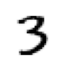

In [221]:
# 이미지 출력
show_image(three_tensors[1]) # PIL library?

In [222]:
# 스택과 동시에 부동소수로 표현
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape 
# shape는 축의 크기, rank 는 축의 갯수

torch.Size([6131, 28, 28])

In [223]:
stacked_threes.ndim
# 3차원 형태

3

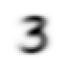

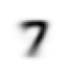

In [224]:
# 쌓아 올린 텐서들을 가지고 해당 픽셀의 평균값을 구한 뒤 하나의 이미지로 새롭게 정의한다.

# 모든 3의 픽셀값에 따른 평균 이미지 재해석
mean3 = stacked_threes.mean(0) # <- 왜 함수의 인자로 0이 들어가는가? 1, 2, -1 다 안됨
show_image(mean3)

# 모든 7의 텐서의 픽셀값에 따른 평균 이미지 재해석
mean7 = stacked_sevens.mean(0)
show_image(mean7)

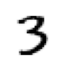

In [225]:
# 차이의 절댓값에 대한 평균 : L1 노름, 평균절대차
# 차이의 제곱에 대한 절댓값 후 제곱근 : L2 노름, 평균제곱근오차

a_3 = stacked_threes[1]
show_image(a_3)

In [226]:
dist_3_abs = (a_3 - mean3).abs().mean() # absolute
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() # squared
dist_3_abs, dist_3_sqr

# (tensor(0.1114), tensor(0.2021))

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

# (tensor(0.1586), tensor(0.3021))

(tensor(0.1586), tensor(0.3021))

In [227]:
# 손실함수로 표현하는 방법

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

# l1 손실함수, 평균제곱오차(mean squared error)에서 제곱근 사용

(tensor(0.1586), tensor(0.3021))

# difference between tensor and numpy

* 기본적으로 numpy는 c언어를 기반으로 만들어졌기 때문에 다양한 형태의 데이터를 담을 수 있고, 자료형만 같다면 다양한 모습으로 연산을 통해 배열을 만들 수 있다.

* numpy는 연산을 압축하여 메모리에 저장하기에 매우 빠른 속도를 자랑한다.

* tensor는 수치형 데이터만 사용할 수 있으며, 다양한 모습으로 변할 수 없어 항상 사각형을 유지해야 한다.

* 단, GPU에 연산을 맡길 수 있어 수 많은 양에 대한 연산이 매우 빠르게 적용하고, 자동으로 미분을 해주기도 한다.

In [228]:
data = [[12, 35, 32], [10, 39, 20]]
arr = array(data)
tns = tensor(data)

arr 
# array([[12, 35, 32], [10, 39, 20]])

tns
# tensor([[12, 35, 32], [10, 39, 20]])

tensor([[12, 35, 32],
        [10, 39, 20]])

In [229]:
# tns[행 : 열]
tns[1] # tensor([10, 39, 20]) : 인덱스 1에 해당되는 행을 들고온다. 2행

tns[:, 0] # tensor([12, 10]) : 인덱스 0에 해당되는 열을 들고온다. 모든 행에 대한 1열

tensor([12, 10])

In [230]:
tns.type() # torch.LongTensor

# 자동으로 정수형에서 부동소수로
tns = tns * 1.5
tns.type() # torch.FloatTensor

'torch.FloatTensor'

# calculate rate through broadcasting

* 학습용 데이터 셋에서만 잘 작동하는 overfit을 피하기 위해 검증용 데이터셋을 사용한다.

* 보통 정확도(accuracy)를 분류 평가지표로 사용한다.

In [231]:
# MNIST 에는 검증용 데이터셋이 따로 분류되어있다. Path('/root/.fastai/data/mnist_sample/valid')

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_3_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

# (torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

In [232]:
# 평균절대오차를 계산하는 함수

def mnist_distance(a,b) : return (a-b).abs().mean((-1, -2)) # 왜 평균에 인자를 넣어주면 브로드캐스팅이 되는가?
mnist_distance(a_3, mean3)

tensor(0.1114)

In [233]:
valid_3_dist = mnist_distance(valid_3_tens, mean3) # 검증용 데이터와 3의 평균이미지와의 오차를 구해 계산
valid_3_dist, valid_3_dist.shape

# len(valid_3_dist) == 1010

# 여기서 valid_3_tens는 rank-3에 해당되는데 mean3 는 rank-2의 테이블 형식이다.
# mnist_distance에서 텐서 간의 격차인 (a-b)에서 broadcasting이 일어난 걸 알 수 있다.

(tensor([0.1153, 0.1063, 0.1471,  ..., 0.1366, 0.1125, 0.1317]),
 torch.Size([1010]))

In [234]:
# 브로드캐스팅이란?

# numpy에서는 차원과 비슷한 개념인데 3차원과 2차원이 연산이 될 때 자동으로 2차원이 3차원으로 변형되면서 연산이 가능해지도록 해주는
# 한 마디로 자동차원(rank)변환

tensor([1,2,3]) + tensor(1) # rank-2의 테이블과 rank-1의 텐서에서 텐서가 자동으로 테이블로 조정되어 연산이 실행되었다.

tensor([2, 3, 4])

In [235]:
# mean3가 1010개 추가된 것처럼 보이지민 실제로 메모리가 할당되진 않는다.
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

In [236]:
# mean()은 그 픽셀별 뺀 값의 평균을 구해준다.

def abso(a,b) : return (a-b).abs()

image1 = abso(valid_3_tens[10], mean7)
df = pd.DataFrame(image1)
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000063,0.000120,0.000084,0.000016,0.000032,0.000040,0.000024,0.000000,0.000230,0.000363,0.000382,0.000337,0.000218,0.000121,0.000001,0.000000,0.000000,0.000000,0.000159,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000093,0.000342,0.001185,0.002433,0.004050,0.006239,0.008319,0.049995,0.468911,0.985824,0.088460,0.008793,0.008164,0.006941,0.004937,0.003501,0.001519,0.000690,0.000536,0.000295,0.000001,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000513,0.001144,0.004512,0.012454,0.023687,0.037022,0.054341,0.071389,0.326828,0.892861,0.884944,0.721920,0.270120,0.122601,0.043442,0.052841,0.003274,0.058155,0.037206,0.022864,0.011055,0.003341,0.000456,0.000011,0.000000,0.000000
7,0.000029,0.000424,0.003263,0.010402,0.028360,0.059792,0.104739,0.157012,0.214893,0.272904,0.279943,0.628096,0.599557,0.582891,0.567566,0.558453,0.554595,0.569871,0.519097,0.347596,0.182863,0.121410,0.058161,0.023271,0.004755,0.000730,0.000000,0.000000
8,0.000120,0.001743,0.011414,0.033500,0.070653,0.132629,0.211860,0.311085,0.411384,0.508958,0.256039,0.342390,0.305005,0.291646,0.275513,0.266571,0.261484,0.277707,0.342677,0.464446,0.280419,0.217183,0.105576,0.040372,0.009248,0.001138,0.000000,0.000000
9,0.000183,0.002802,0.018204,0.050405,0.101714,0.179732,0.278085,0.395733,0.510971,0.612353,0.556306,0.145653,0.281099,0.634107,0.434543,0.268093,0.194981,0.141612,0.251808,0.368273,0.265211,0.257098,0.122494,0.042672,0.008554,0.001276,0.000098,0.000128


In [237]:
# mean() 에 인자로 (-1,-2)의 튜플을 넣어주는 이유는 특정 위치의 평균만을 구하고 싶을 때 사용한다.
# tensor의 shape는 대게 [1, 40, 40] 이런 식인데 -1, -2의 인덱싱을 통해 가로 세로의 값들만 가지고 평균을 구할 때 사용한다.
# 즉 가로 세로를 가지고 구하는 값은 단 rank-1의 텐서를 가지며 이러한 텐서가 stack된 1010개를 가지고 있다. 그래서 텐서의 크기가 (1010)인 이유다.

In [238]:
# 특정 숫자의 이미지와 이상적인 숫자의 거리가 짧다면 그 숫자가 동일하다는 판단하는 함수를 가지고 학습한다.
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7) 


# 위 함수는 x에 특정 숫자를 넣었을 때 3과의 차이가 7보다 적다면(3과 거의 동일시) True를 반환한다.

is_3(valid_3_tens[10]) # True
is_3(valid_3_tens).float() # tensor([1., 1., 1.,  ..., 1., 1., 1.]) True면 1을 반환 False는 0을 반환
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean() # 1.0 == 100% 맞다..

accuracy_7s, accuracy_3s, (accuracy_7s + accuracy_3s) /2 

(tensor(1.), tensor(0.9168), tensor(0.9584))

# stochastic gradient descent 확률적 경사하강법

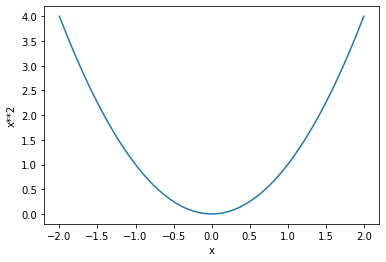

In [239]:
def f(x) : return x**2

plot_function(f, 'x', 'x**2') # function을 가지고 그래프를 표시, 2,3번째 인자는 각각 가로 세로의 태그

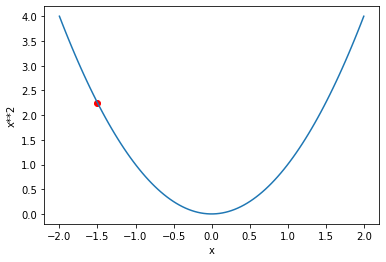

In [240]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [241]:
# 특정값의 변수에 대한 gradient를 계산해달라고 하는 함수 : requires_grad_()

xt = tensor(3.).requires_grad_() # tensor(3., requires_grad=True)

yt = f(xt)
yt.backward() # 그레디언트 계산 initialize

xt.grad

tensor(6.)

In [242]:
xt = tensor([10., 36., 25.]).requires_grad_()
xt # tensor([10., 36., 25.], requires_grad=True)

def f(x): return (x**2).sum()
yt = f(xt)
yt # 100 + 36^2 + 25^2

tensor(2021., grad_fn=<SumBackward0>)

In [243]:
# 위 예제 미분

yt.backward()
xt.grad # 기울기 2x에 값을 대입

tensor([20., 72., 50.])

4.4.2

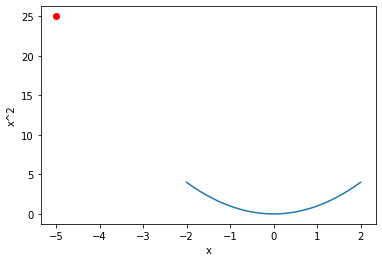

In [244]:
# 학습률을 사용하여 그레디언트의 파라미터를 조정해 나아갈 수 있다.
# 학습률은 대게 0.1 ~ 0.001 사이며, 학습의 과정을 통해 좋은 모델의 결과 속 학습률을 사용할 수도 있다.

# w -= w.grad * lr 을 최적화 단계를 사용한 파라미터의 갱신단계라고 불린다.
def f(x) : return (x**2)
plot_function(f, 'x' , 'x^2')
plt.scatter(-5 , f(-5), color='red')

# 만약 학습률이 0.01이라면?

# -5 -= 2 * 5 * 0.01 = -4.9 << 미비함

# 만약 학습률이 1이라면?

# -5 -= 2 * 5 * 1 = 5 << 뛰어다니는 현상 발생

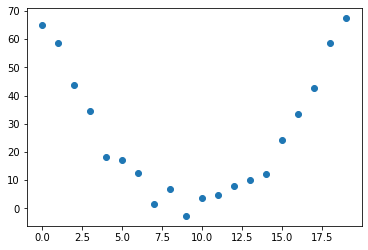

In [245]:
# 확률적 경사하강법을 활용하여 시작부터 끝까지 보여주는 예제

time = torch.arange(0,20).float() # tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])
speed = torch.randn(20)*3 + 0.75 * (time-9.5)**2 + 1
plt.scatter(time,speed)

# speed => tensor([71.3436, 55.7348, 45.5466, 32.5137, 22.7267, 13.6544,  8.5335, 
# 11.6544,  5.2311, -0.8985,  2.1044,  3.5602,  0.3670,  8.0736, 15.0035, 29.3479, 
# 33.2235, 43.0720, 54.9268, 65.1467])



In [246]:
# 파라미터를 조정할 함수의 입력
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [247]:
# 연속적인 값을 예측하는 회귀문제에서는 일반적으로 평균제곱오차 손실함수를 사용한다.
def mse(pred, target): return ((pred - target)**2).mean()

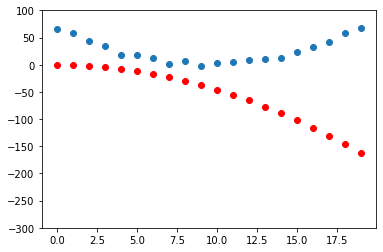

In [248]:
params = torch.randn(3).requires_grad_() # tensor([-0.1335,  0.3415, -0.0716], requires_grad=True)
# randn은 평균이 0이고 표준편차가 1인 정규분포 내에 값들을 크기에 맞게 랜덤으로 부여한다.

preds = f(time, params) # 시간에 따라 값이 점점 더 커지는 모습을 보여준다.

def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1] # 왜 인덱스 1을 넣어야하는가?
  ax.scatter(time,speed) # 기존의 시간 별 속도 plot
  ax.scatter(time, to_np(preds), color='red') # to_numpy로 예측값을 바꿔준다. 왜 굳이 넘파이로 변환하지?
  ax.set_ylim(-300, 100) # 그래프 y limit

# type(preds) => torch.Tensor
# type(to_np(preds)) => numpy.ndarray
# type(time) => torch.Tensor

show_preds(preds)

In [249]:
loss = mse(preds, speed)
loss

# 다음과 같은 손실평균이 났다.

# loss도 그래프처럼 만들어지는데 여기서 파라미터의 그래디언트를 계산해준다

tensor(10462.2783, grad_fn=<MeanBackward0>)

In [250]:
loss.backward() # 한 번만 실행해주고 그 다음부턴 안됨
params.grad

# tensor([-164.1040,  -10.3645,   -0.7590])

params.grad * 1e-5 # 더 작은 가중치로 조정되었다.

tensor([-0.3325, -0.0213, -0.0016])

In [251]:
# 가중치 갱신하기
lr = 1e-5

params.data -= lr * params.grad.data # 가중치를 조정하고
params.grad = None # 다시 미분값을 없음으로 정의한다.

In [252]:
# 조정확인

preds = f(time, params)
mse(preds, speed) # 오차가 감소하였다.

tensor(2495.1694, grad_fn=<MeanBackward0>)

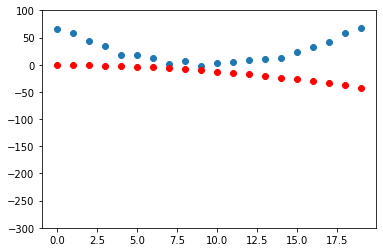

In [253]:
show_preds(preds)

지금까지의 과정을 다시 함수로

In [254]:
def apply_step(params, prn=True):
  preds = f(time, params) # 시간과 파라미터를 곱한 2차함수
  loss = mse(preds, speed) # 예측과 스피드를 제곱평균 손실함수로 계산
  loss.backward() # 손실을 미분가능한 상태로 만들어준 뒤
  params.data -= lr * params.grad.data # 파라미터를 오차율과 그레디언트의 차로 계산함
  params.grad = None
  if prn: print(loss.item()) # 손실의 정도를 출력해주고,
  return preds # 예측값을 반환


In [255]:
for i in range(10): apply_step(params)

2495.16943359375
987.5460815429688
702.2550659179688
648.2666015625
638.0474243164062
636.1110229492188
635.7418212890625
635.6691284179688
635.6527099609375
635.6468505859375


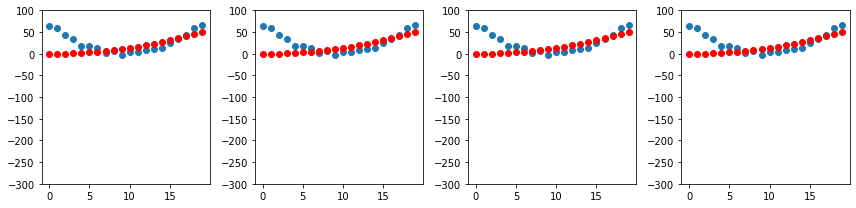

In [256]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()